## Probem Statement -
### Predict delivery time using sorting time

### importing library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [8]:
df_tim = pd.read_csv('E:\\deeksha\\python\\data\\delivery_time.csv')

In [9]:
df_tim.rename(columns={'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, inplace=True)

In [10]:
df_tim.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
df_tim.shape

(21, 2)

In [12]:
df_tim.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
df_tim.count()

delivery_time    21
sorting_time     21
dtype: int64

### Performing EDA

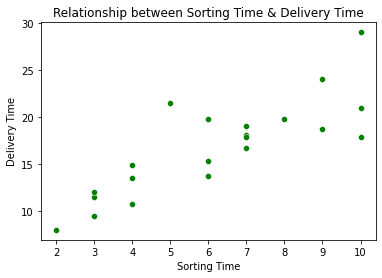

In [14]:
sns.scatterplot(x='sorting_time', y='delivery_time', data=df_tim,color='green')

# Add labels and title
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Relationship between Sorting Time & Delivery Time')

# Show the plot
plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

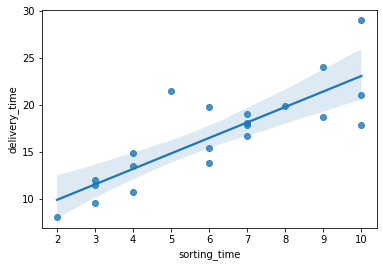

In [15]:
sns.regplot(x='sorting_time',y= 'delivery_time' , data = df_tim )

## checking Correlation

In [16]:
df_tim.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


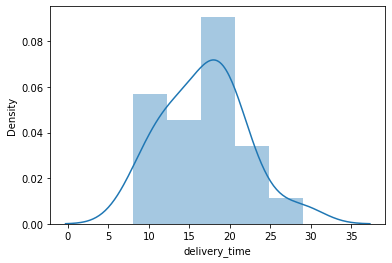

In [17]:
sns.distplot(df_tim['delivery_time'])
import warnings
warnings.filterwarnings("ignore")

In [18]:
X= df_tim.iloc[:,-1:]

In [19]:
X.head()

,sorting_time
0,10
1,4
2,6
3,9
4,10


In [20]:
y = df_tim.iloc[:,:1]

In [21]:
y.head()

,delivery_time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00


#### Predicting x variable

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=110)

In [23]:
X_train

,sorting_time
19,7
1,4
14,3
5,6
9,9
8,10
11,4
2,6
6,7
17,7


In [24]:
X_test

,sorting_time
4,10
10,8
7,3
12,7
13,3


In [25]:
y_train

,delivery_time
19,17.83
1,13.50
14,12.03
5,15.35
9,18.75
8,17.90
11,10.75
2,19.75
6,19.00
17,18.11


In [26]:
y_test

,delivery_time
4,29.00
10,19.83
7,9.50
12,16.68
13,11.50


In [27]:
X_train.shape

(16, 1)

In [28]:
X_test.shape

(5, 1)

In [29]:
y_train.shape

(16, 1)

In [30]:
y_test.shape

(5, 1)

#### Building Linear Regression

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
df_tim

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [34]:
import statsmodels.formula.api as smf


In [35]:
df_tim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [36]:
df_tim2 = df_tim.rename(columns={'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'})

In [37]:
df_tim2.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [48]:
model = smf.ols("delivery_time~sorting_time",data= df_tim2).fit()

In [49]:
model

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

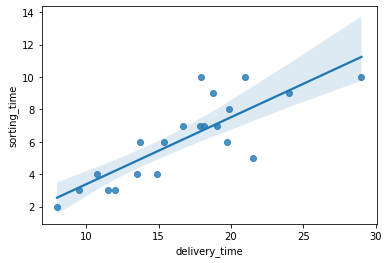

In [50]:
sns.regplot(x='delivery_time',y= 'sorting_time' , data = df_tim )

#### model parameters

In [68]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
import statsmodels.api as sm
coef = model.params

In [70]:
coef

sorting_time    2.565246
dtype: float64

In [53]:
X_test

,sorting_time
4,10
10,8
7,3
12,7
13,3


#### prediction on test data

In [54]:
y_pred_test = model.predict(X_test)
y_pred_test

4     23.072933
10    19.774893
7     11.529794
12    18.125873
13    11.529794
dtype: float64

In [55]:
y_pred_train = model.predict(X_train)
y_pred_train

19    18.125873
1     13.178814
14    11.529794
5     16.476853
9     21.423913
8     23.072933
11    13.178814
2     16.476853
6     18.125873
17    18.125873
16    16.476853
20    14.827833
18     9.880774
15    13.178814
3     21.423913
0     23.072933
dtype: float64

In [56]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

0.555579277087529   0.8263962061874096


## ANSWER-  0.5886662404946716          ,           0.7336800410848641

In [57]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 8.268932024899946
Root Mean Squared Error (RMSE): 2.8755750772497572


In [58]:
X_test

,sorting_time
4,10
10,8
7,3
12,7
13,3
